## Question
Which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?

## The Data Science Pipeline
Four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

#### 1.1. Importing Libraries

In [264]:
# Import the pandas, numpy libraries as pd, and np respectively. 
# Also Load the pyplot collection of functions from matplotlib, as plt 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [265]:
url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls" 
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

### 2. Cleaning, transforming, and visualizing
The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

In [278]:
## Webscrape the names of the boroughs in London
import requests
from bs4 import BeautifulSoup

URL = "https://en.wikipedia.org/wiki/List_of_London_boroughs"
res = requests.get(URL).text
soup = BeautifulSoup(res,'lxml')
boroughs_raw = []
for items in soup.find('table', class_='wikitable').find_all('tr')[1::1]:
    data = items.find_all(['th','td'])
    try:
        boroughs_raw.append(data[0].a.text)
    except IndexError:pass

## Match the names to the dataframe "property"
boroughs = []
for borough in boroughs_raw:
    boroughs.append(borough.replace(" and ", " & "))

boroughs

['Barking & Dagenham',
 'Barnet',
 'Bexley',
 'Brent',
 'Bromley',
 'Camden',
 'Croydon',
 'Ealing',
 'Enfield',
 'Greenwich',
 'Hackney',
 'Hammersmith & Fulham',
 'Haringey',
 'Harrow',
 'Havering',
 'Hillingdon',
 'Hounslow',
 'Islington',
 'Kensington & Chelsea',
 'Kingston upon Thames',
 'Lambeth',
 'Lewisham',
 'Merton',
 'Newham',
 'Redbridge',
 'Richmond upon Thames',
 'Southwark',
 'Sutton',
 'Tower Hamlets',
 'Waltham Forest',
 'Wandsworth',
 'Westminster']

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

In [279]:
print(properties.shape)
properties.head()

(306, 49)


,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91449,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,79885.9,...,43958.5,44803.4,45544.5,48527.5,56701.6,74435.8,64018.9,54705.2,NaN,53202.8
2,1995-02-01,82202.8,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,80897.1,...,43925.4,44528.8,46051.6,49341.3,56593.6,72777.9,63715,54356.1,NaN,53096.2
3,1995-03-01,79120.7,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,81379.9,...,44434.9,45200.5,45383.8,49442.2,56171.2,73896.8,64113.6,53583.1,NaN,53201.3
4,1995-04-01,77101.2,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,82188.9,...,44267.8,45614.3,46124.2,49455.9,56567.9,74455.3,64623.2,54786,NaN,53590.9


**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [280]:
ID_dict = dict(zip(list(properties.columns), list(properties.iloc[0])))
df = properties.rename(columns = {'Unnamed: 0':'Date'})
df2 = df[np.intersect1d(df.columns, ["Date"] + boroughs)]

properties_clean = df2.drop(df2.index[0])
properties_clean

,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Date,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
1,50460.2,93284.5,64958.1,71306.6,81671.5,120933,69158.2,1995-01-01,79885.9,72514.7,...,82070.6,53539.3,72189.6,109326,67885.2,71537,59865.2,61319.4,88559,133025
2,51085.8,93190.2,64787.9,72022.3,81657.6,119509,68951.1,1995-02-01,80897.1,73155.2,...,79982.7,53153.9,72141.6,111103,64799.1,70893.2,62318.5,60252.1,88641,131468
3,51269,92247.5,64367.5,72015.8,81449.3,120282,68712.4,1995-03-01,81379.9,72190.4,...,80661.7,53458.3,72501.4,107325,65763.3,70306.8,63938.7,60871.1,87124.8,132260
4,53133.5,90762.9,64277.7,72965.6,81124.4,120098,68610,1995-04-01,82188.9,71442.9,...,79990.5,54479.8,72228.6,106875,63073.6,69411.9,66233.2,60971.4,87026,133370
5,53042.2,90258,63997.1,73704,81542.6,119929,68844.9,1995-05-01,82077.1,70630.8,...,80874,55804,72366.6,107708,64420.5,69759.2,66432.9,61494.2,86518.1,133911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,303653,518542,334765,423161,435532,815512,371227,2020-01-01,466491,390589,...,501370,367017,422633,662919,499906,372982,463719,441446,605540,1.01165e+06
302,304265,519121,337760,467145,435704,825249,371357,2020-02-01,465614,389901,...,500782,376713,422506,658932,499775,373644,473163,437879,610145,1.01658e+06
303,304099,527747,339215,461398,434625,870107,370872,2020-03-01,478565,395082,...,509365,379837,426848,658654,504904,376708,482143,438596,614426,1.01398e+06
304,283139,526553,346840,494455,443482,870627,386738,2020-04-01,502107,400695,...,529857,356915,435763,683248,508543,376808,480984,440354,607227,1.03449e+06


**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [281]:
properties_tidy = properties_clean.melt(["Date"], var_name = "Borough", value_name = "Housing Price")
properties_tidy['ID'] = properties_tidy['Borough'].map(ID_dict)
print(properties_tidy)

           Date             Borough Housing Price         ID
0    1995-01-01  Barking & Dagenham       50460.2  E09000002
1    1995-02-01  Barking & Dagenham       51085.8  E09000002
2    1995-03-01  Barking & Dagenham         51269  E09000002
3    1995-04-01  Barking & Dagenham       53133.5  E09000002
4    1995-05-01  Barking & Dagenham       53042.2  E09000002
...         ...                 ...           ...        ...
9755 2020-01-01         Westminster   1.01165e+06  E09000033
9756 2020-02-01         Westminster   1.01658e+06  E09000033
9757 2020-03-01         Westminster   1.01398e+06  E09000033
9758 2020-04-01         Westminster   1.03449e+06  E09000033
9759 2020-05-01         Westminster        937356  E09000033

[9760 rows x 4 columns]


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [282]:
properties_tidy = properties_tidy.astype({"Borough":str, "Housing Price":float}) 
print(properties_tidy.dtypes)

Date             datetime64[ns]
Borough                  object
Housing Price           float64
ID                       object
dtype: object


**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [283]:
print(len(set(properties_tidy["Borough"])))

32


**2.6. Visualizing the data**

Plot the average housing price in Lodon.

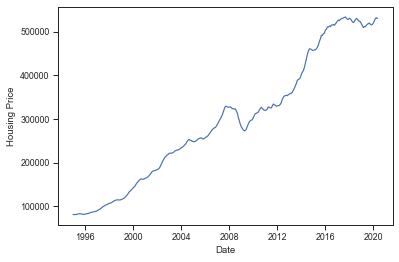

In [284]:
import seaborn as sns
sns.lineplot(data=properties_tidy.groupby(["Date"]).mean().reset_index(), x="Date", y="Housing Price")

Smooth the data by the *average monthly* housing price.

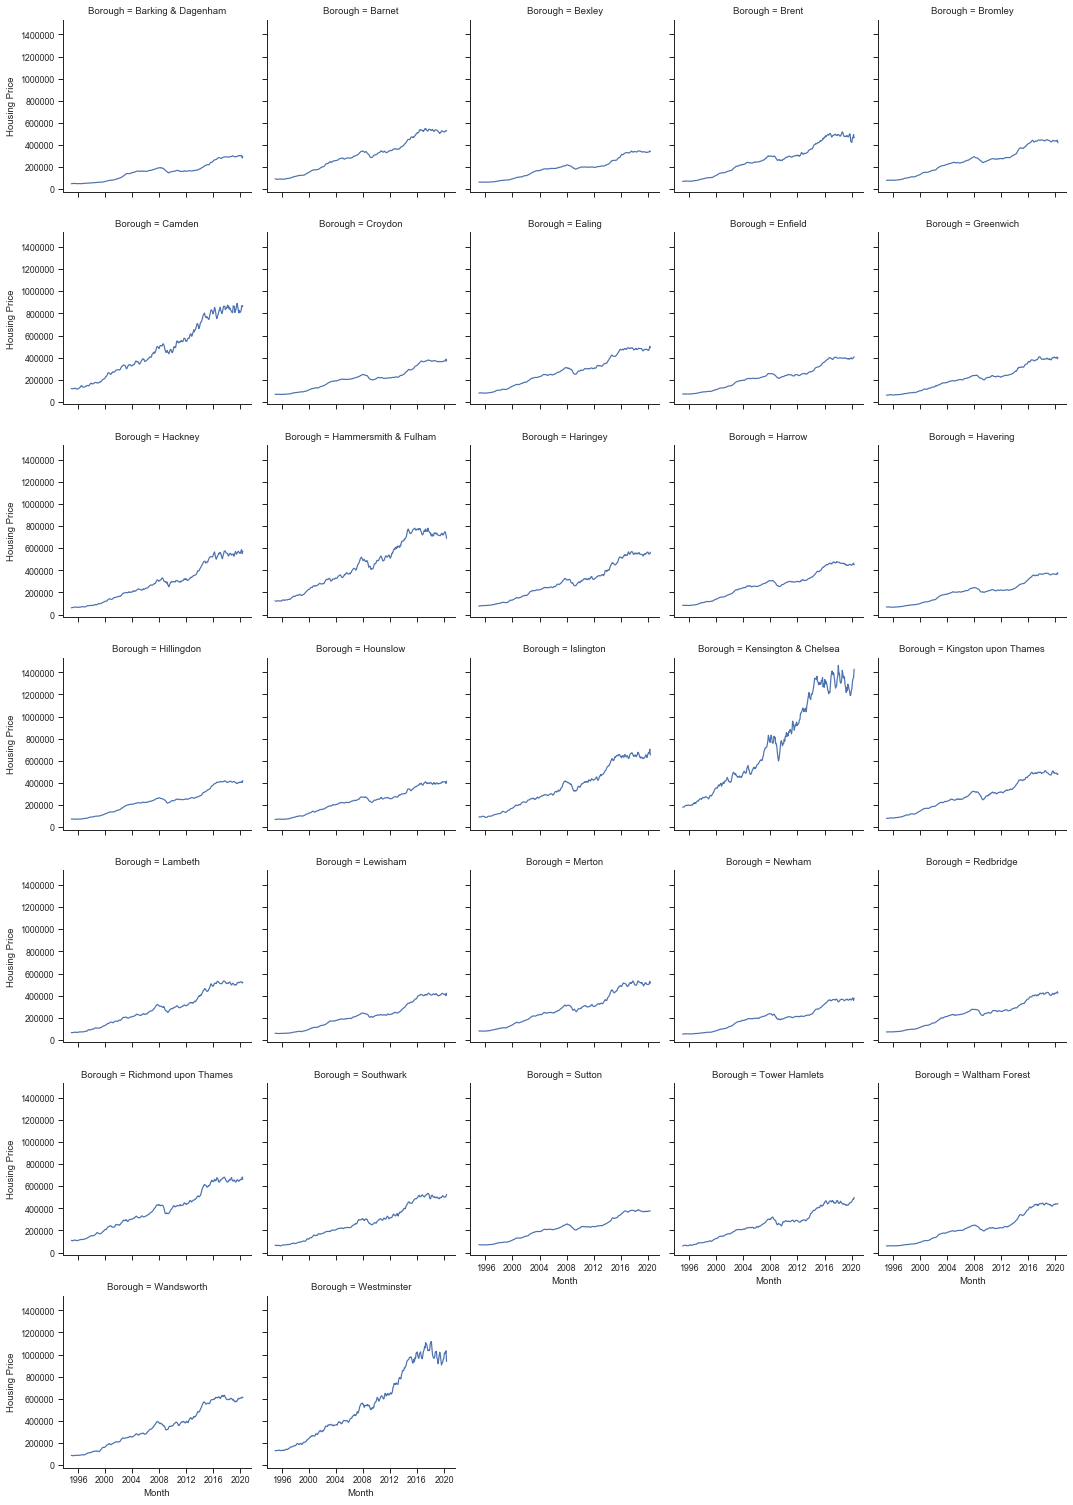

In [285]:
import datetime

properties_tidy['Month'] = properties_tidy['Date'] + datetime.timedelta(days=14)
properties_tidy_by_month = properties_tidy.groupby(["Borough", "Month"]).mean().reset_index()
g = sns.FacetGrid(properties_tidy_by_month, col="Borough", col_wrap=5, height=3)
g.map(sns.lineplot,"Month", "Housing Price")

**3. Modeling**

Calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

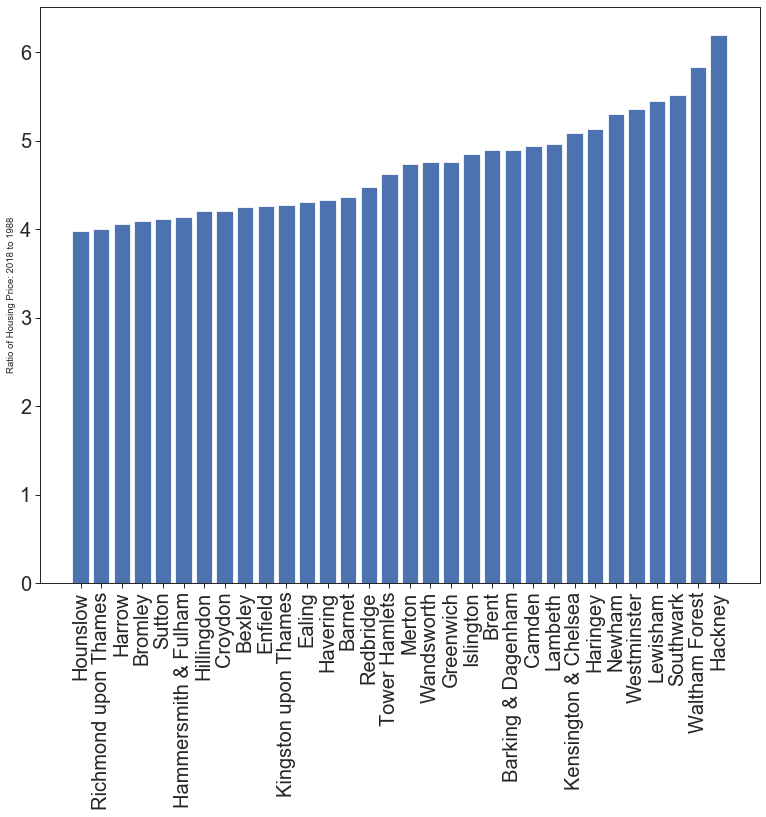

In [339]:
def compute_ratio(properties_tidy, borough_name):
    properties_tidy['Year'] = pd.DatetimeIndex(properties_tidy['Date']).year
    properties_tidy_by_year = properties_tidy.groupby(["Borough", "Year"]).mean().reset_index()
    filter_bool = properties_tidy_by_year["Borough"] == borough_name
    df = properties_tidy_by_year[filter_bool]
    ratio = df.loc[df["Year"] == 2018, ["Housing Price"]].values / df.loc[df["Year"] == 1998, ["Housing Price"]].values
    return(float(ratio))

compute_ratio(properties_tidy, "Barnet")

ratios = [compute_ratio(properties_tidy, b) for b in boroughs]
ratios_sorted, boroughs_sorted = (list(t) for t in zip(*sorted(zip(ratios, boroughs))))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0,0,1,1])
ax.bar(boroughs_sorted, ratios_sorted)
plt.xticks(rotation=90)
plt.ylabel("Ratio of Housing Price: 2018 to 1988")
plt.show()

### 4. Conclusion
Ingeneral, the housing price has grown a lot in London. Specifically, Hounslow, Richmond upon Thames, Harrow have the lowest growing rate in housing prices. From 1988 to 2018, the housing price increased by approximately 300%. Hackney has the highest growing rate in housing price which increased by morethan 500%;
